In [1]:
# import required packages 
using DataFrames
using FreqTables
using Plots, StatPlots
using DecisionTree
using StatsModels
using MLDataUtils

#Set the backend as matplotlib.pyplot
pyplot()

Plots.PyPlotBackend()

Nullable{S}, Base.Nullable{T}) in module Base at nullable.jl:238 overwritten in module NullableArrays at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\NullableArrays\src\operators.jl:99.


In [2]:
# Read Dataset
data = readtable("C:/Users/veer/Desktop/Projects/Julia_In_Banking/Data/fraud_full_sample.csv")

,isFraud,_type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1,No,CASH_OUT,1,95636.49,0.0,0.0,359141.7,1.36336851e6
2,Yes,TRANSFER,1,181.0,181.0,0.0,0.0,0.0
3,Yes,CASH_OUT,1,181.0,181.0,0.0,21182.0,0.0
4,Yes,TRANSFER,1,2806.0,2806.0,0.0,0.0,0.0
5,Yes,CASH_OUT,1,2806.0,2806.0,0.0,26202.0,0.0
6,Yes,TRANSFER,1,20128.0,20128.0,0.0,0.0,0.0
7,Yes,CASH_OUT,1,20128.0,20128.0,0.0,6268.0,12145.85
8,Yes,CASH_OUT,1,416001.33,0.0,0.0,102.0,9.29161962e6
9,Yes,TRANSFER,1,1.27721277e6,1.27721277e6,0.0,0.0,0.0
10,Yes,CASH_OUT,1,1.27721277e6,1.27721277e6,0.0,0.0,2.44498519e6


In [3]:
# Create 02 categories (numeric) for loan status
data[:fraud_status] = ifelse.(data[:isFraud] .== "Yes",1,0)
delete!(data,:isFraud)

,_type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,fraud_status
1,CASH_OUT,1,95636.49,0.0,0.0,359141.7,1.36336851e6,0
2,TRANSFER,1,181.0,181.0,0.0,0.0,0.0,1
3,CASH_OUT,1,181.0,181.0,0.0,21182.0,0.0,1
4,TRANSFER,1,2806.0,2806.0,0.0,0.0,0.0,1
5,CASH_OUT,1,2806.0,2806.0,0.0,26202.0,0.0,1
6,TRANSFER,1,20128.0,20128.0,0.0,0.0,0.0,1
7,CASH_OUT,1,20128.0,20128.0,0.0,6268.0,12145.85,1
8,CASH_OUT,1,416001.33,0.0,0.0,102.0,9.29161962e6,1
9,TRANSFER,1,1.27721277e6,1.27721277e6,0.0,0.0,0.0,1
10,CASH_OUT,1,1.27721277e6,1.27721277e6,0.0,0.0,2.44498519e6,1


In [4]:
rename!(data, :fraud_status, :isFraud)

,_type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1,CASH_OUT,1,95636.49,0.0,0.0,359141.7,1.36336851e6,0
2,TRANSFER,1,181.0,181.0,0.0,0.0,0.0,1
3,CASH_OUT,1,181.0,181.0,0.0,21182.0,0.0,1
4,TRANSFER,1,2806.0,2806.0,0.0,0.0,0.0,1
5,CASH_OUT,1,2806.0,2806.0,0.0,26202.0,0.0,1
6,TRANSFER,1,20128.0,20128.0,0.0,0.0,0.0,1
7,CASH_OUT,1,20128.0,20128.0,0.0,6268.0,12145.85,1
8,CASH_OUT,1,416001.33,0.0,0.0,102.0,9.29161962e6,1
9,TRANSFER,1,1.27721277e6,1.27721277e6,0.0,0.0,0.0,1
10,CASH_OUT,1,1.27721277e6,1.27721277e6,0.0,0.0,2.44498519e6,1


In [5]:
# Explore Loan Amount
freqtable(data[:isFraud])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼─────
0     │ 8213
1     │ 8213

In [6]:
describe(data[:amount])

Summary Stats:
Mean:           884267.745135
Minimum:        0.000000
1st Quartile:   96961.040000
Median:         234740.010000
3rd Quartile:   635409.320000
Maximum:        10000000.000000
Length:         16426
Type:           Float64
Number Missing: 0
% Missing:      0.000000


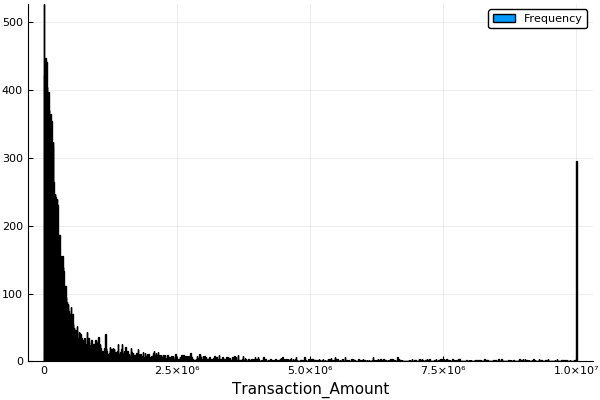

In [7]:
# Plot Histogram for Applicant Income
Plots.histogram(data[:amount], bins = 1000, xlabel = "Transaction_Amount", labels = "Frequency")

In [8]:
eltypes(data)

8-element Array{Type,1}:
 String 
 Int64  
 Float64
 Float64
 Float64
 Float64
 Float64
 Int64  

In [9]:
freqtable(data[:_type])

2-element Named Array{Int64,1}
Dim1     │ 
─────────┼──────
CASH_OUT │ 10759
TRANSFER │  5667

In [10]:
# Label Encoding-- Transaction Type
data[:CASH_OUT] = ifelse.(data[:_type] .== "CASH_OUT",1,0) # The value 0 is for Transfer type transaction
delete!(data,:_type)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT
1,1,95636.49,0.0,0.0,359141.7,1.36336851e6,0,1
2,1,181.0,181.0,0.0,0.0,0.0,1,0
3,1,181.0,181.0,0.0,21182.0,0.0,1,1
4,1,2806.0,2806.0,0.0,0.0,0.0,1,0
5,1,2806.0,2806.0,0.0,26202.0,0.0,1,1
6,1,20128.0,20128.0,0.0,0.0,0.0,1,0
7,1,20128.0,20128.0,0.0,6268.0,12145.85,1,1
8,1,416001.33,0.0,0.0,102.0,9.29161962e6,1,1
9,1,1.27721277e6,1.27721277e6,0.0,0.0,0.0,1,0
10,1,1.27721277e6,1.27721277e6,0.0,0.0,2.44498519e6,1,1


In [11]:
# Partition Data into Train and Test datasets
function partitionTrainTest(data, at = 0.7)
    n = nrow(data)
    idx = shuffle(1:n)
    train_idx = view(idx, 1:floor(Int, at*n))
    test_idx = view(idx, (floor(Int, at*n)+1):n)
    data[train_idx,:], data[test_idx,:]
end

train,test = partitionTrainTest(data, 0.7) # 70% train

(11498×8 DataFrames.DataFrame
│ Row   │ step │ amount    │ oldbalanceOrg │ newbalanceOrig │ oldbalanceDest │
├───────┼──────┼───────────┼───────────────┼────────────────┼────────────────┤
│ 1     │ 398  │ 2.74714e5 │ 50871.0       │ 0.0            │ 2.06705e6      │
│ 2     │ 207  │ 72955.5   │ 0.0           │ 0.0            │ 432919.0       │
│ 3     │ 398  │ 162280.0  │ 0.0           │ 0.0            │ 2.27533e5      │
│ 4     │ 153  │ 58130.0   │ 0.0           │ 0.0            │ 5.66828e5      │
│ 5     │ 15   │ 2.48056e5 │ 2.48056e5     │ 0.0            │ 0.0            │
│ 6     │ 69   │ 5.52148e6 │ 5.52148e6     │ 0.0            │ 0.0            │
│ 7     │ 243  │ 5.04415e6 │ 5.04415e6     │ 0.0            │ 0.0            │
│ 8     │ 247  │ 8.02421e5 │ 8.02421e5     │ 0.0            │ 1.18463e7      │
│ 9     │ 8    │ 5160.96   │ 0.0           │ 0.0            │ 12142.6        │
│ 10    │ 387  │ 1.0e7     │ 1.91109e7     │ 9.11088e6      │ 0.0            │
│ 11    │ 35   │ 1.512

In [12]:
# Missing value imputation
showcols(train)
# There is no missing value, therefore this step is not required

11498×8 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ step           │ Int64   │ 0       │
│ 2     │ amount         │ Float64 │ 0       │
│ 3     │ oldbalanceOrg  │ Float64 │ 0       │
│ 4     │ newbalanceOrig │ Float64 │ 0       │
│ 5     │ oldbalanceDest │ Float64 │ 0       │
│ 6     │ newbalanceDest │ Float64 │ 0       │
│ 7     │ isFraud        │ Int64   │ 0       │
│ 8     │ CASH_OUT       │ Int64   │ 0       │

In [13]:
y_train = train[:,:isFraud]
X_train = train[:,[1,2,3,4,5,6,8]]
y_test = test[:,:isFraud]
X_test = test[:,[1,2,3,4,5,6,8]]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT
1,306,2190.72,250769.92,248579.2,1.15638638e6,1.1585771e6,1
2,111,501496.31,501496.31,0.0,0.0,501496.31,1
3,394,114232.6,19702.75,0.0,887690.49,1.0019231e6,1
4,401,50979.99,0.0,0.0,5.84552741e6,5.89650739e6,1
5,358,337117.89,0.0,0.0,1.93674748e6,2.27386536e6,1
6,508,385050.58,385050.58,0.0,1.48289976e6,1.86795034e6,1
7,279,45888.9,107843.0,61954.1,140250.02,186138.91,1
8,244,4.44859893e6,4.44859893e6,0.0,3.1963046e6,7.64490353e6,1
9,211,73636.95,457.0,0.0,231323.37,413413.36,1
10,22,13727.36,0.0,0.0,99282.64,113010.0,1


In [14]:
# Convert all the datasets in to arrays
# Convert data types for all the columns in training dataset to float type
for c = eachcol(X_train)
  if eltype(c[2]) <: Integer
    X_train[c[1]] = X_train[c[1]] .* 1.0
  end
end

for c = eachcol(X_test)
  if eltype(c[2]) <: Integer
    X_test[c[1]] = X_test[c[1]] .* 1.0
  end
end

X_train1 = convert(Array, X_train)
X_test1 = convert(Array, X_test)
y_train1 = convert(Array, y_train)
y_test1 = convert(Array, y_test)

4928-element Array{Int64,1}:
 0
 1
 0
 0
 0
 1
 0
 1
 0
 0
 1
 1
 1
 ⋮
 0
 0
 1
 0
 0
 1
 0
 0
 1
 1
 1
 0

In [15]:
# Build a standard scaler
type StandardScalar
    mean::Vector{Float64}
    std::Vector{Float64}
end

# Helper function to initialize an empty scalar
function StandardScalar()
    StandardScalar(Array(Float64,0),Array(Float64,0))
end

# Compute mean and standard deviation of each column
function fit_std_scalar!(std_scalar::StandardScalar,X::Matrix{Float64})
    n_rows, n_cols = size(X)
    std_scalar.std = zeros(n_cols)
    std_scalar.mean = zeros(n_cols)
    # for loops are fast again!
    for i = 1:n_cols
        std_scalar.mean[i] = mean(X[:,i])
        std_scalar.std[i] = std(X[:,i])
    end
end

function transform(std_scalar::StandardScalar,X::Matrix{Float64})
    (X .- std_scalar.mean') ./ std_scalar.std' # broadcasting
end

# fit and transform in one function
function fit_transform!(std_scalar::StandardScalar,X::Matrix{Float64})
    fit_std_scalar!(std_scalar,X)
    transform(std_scalar,X)
end

fit_transform! (generic function with 1 method)

In [16]:
# Perform Standard Scaling for all X variables
std_scalar = StandardScalar()

X_train1 = fit_transform!(std_scalar,X_train1)
X_test1 = transform(std_scalar,X_test1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at .\deprecated.jl:57
 [3] StandardScalar() at .\In[15]:9
 [4] include_string(::String, ::String) at .\loading.jl:522
 [5] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\eventloop.jl:8
 [9] (::IJulia.##14#17)() at .\task.jl:335
while loading In[16], in expression starting on line 2


4928×7 Array{Float64,2}:
  0.00732553  -0.476816   -0.224642   …   0.010536   -0.137676    0.721284
 -1.00181     -0.208619   -0.130842      -0.346932   -0.316511    0.721284
  0.462729    -0.416633   -0.311086      -0.0725246  -0.180312    0.721284
  0.498954    -0.450609   -0.318457       1.46007     1.15182     0.721284
  0.276428    -0.296913   -0.318457       0.251765    0.165867    0.721284
  1.05268     -0.271166   -0.174406   …   0.111469    0.0553906   0.721284
 -0.132401    -0.453343   -0.278112      -0.303577   -0.40234     0.721284
 -0.313527     1.91153     1.34581        0.641126    1.62768     0.721284
 -0.484303    -0.438439   -0.318286      -0.275424   -0.340484    0.721284
 -1.46239     -0.470619   -0.318457      -0.316241   -0.422243    0.721284
  1.23898     -0.256332   -0.164074   …   0.0997684   0.0526051   0.721284
  1.65816      4.89341     3.42264        0.321044    2.85676     0.721284
  0.757706    -0.222478   -0.140496      -0.346932   -0.453001   -1.3863  


In [17]:
labels= y_train1
features= X_train1

11498×7 Array{Float64,2}:
  0.483429  -0.330432   -0.299426   …   0.292045   0.184347   0.721284
 -0.505003  -0.438805   -0.318457      -0.213106  -0.315319   0.721284
  0.483429  -0.390825   -0.318457      -0.276596  -0.346907   0.721284
 -0.784456  -0.446768   -0.318457      -0.171711  -0.282909   0.721284
 -1.49861   -0.344751   -0.225657      -0.346932  -0.398179   0.721284
 -1.21916    2.48782     1.74718    …  -0.346932  -0.453001  -1.3863  
 -0.318702   2.23142     1.56861       -0.346932   0.919841   0.721284
 -0.298002  -0.0469797  -0.0182636      3.31504    2.98953    0.721284
 -1.53484   -0.47522    -0.318457      -0.343178  -0.448291   0.721284
  0.426504   4.89341     6.83111       -0.346932  -0.453001  -1.3863  
 -1.39511   -0.396745   -0.318457   …  -0.244051  -0.321253   0.721284
 -0.323877  -0.248003   -0.158273      -0.327226  -0.319117   0.721284
  0.359228   0.579331    0.417952      -0.346932  -0.453001  -1.3863  
  ⋮                                 ⋱              

In [18]:
# Apply Artificial Neural Network
using ANN

In [19]:
ann = ArtificialNeuralNetwork(32)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{ANN.NeuralLayer}, ::Int64) at .\deprecated.jl:57
 [3] ANN.ArtificialNeuralNetwork(::Int64) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:60
 [4] include_string(::String, ::String) at .\loading.jl:522
 [5] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\eventloop.jl:8
 [9] (::IJulia.##14#17)() at .\task.jl:335
while loading In[

ANN.ArtificialNeuralNetwork(ANN.NeuralLayer[], [32], Int64[])

In [20]:
using ANN: fit!, predict

In [21]:
fit!(ann,features,labels,epochs=30,alpha=0.1,lambda=1e-5)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{ANN.NeuralLayer}, ::Int64) at .\deprecated.jl:57
 [3] init!(::ANN.ArtificialNeuralNetwork, ::Array{Float64,2}, ::Array{Int64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:80
 [4] #fit!#3(::Int64, ::Float64, ::Float64, ::Function, ::ANN.ArtificialNeuralNetwork, ::Array{Float64,2}, ::Array{Int64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:101
 [5] (::ANN.#kw##fit!)(::Array{Any,1}, ::ANN.#fit!, ::ANN.ArtificialNeuralNetwork, ::Array{Float64,2}, ::Array{Int64,1}) at .\<missing>:0
 [6] include_string(::String, ::String) at .\loading.jl:522
 [7] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [9] (::Compat.#inner#17{Array{Any,1},IJulia.#e

In [22]:
y_proba = predict(ann,X_test1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] exp(::Array{Float64,1}) at .\deprecated.jl:57
 [3] sigm(::Array{Float64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:20
 [4] forward_propagate(::ANN.NeuralLayer, ::Array{Float64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:68
 [5] predict(::ANN.ArtificialNeuralNetwork, ::Array{Float64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:136
 [6] predict(::ANN.ArtificialNeuralNetwork, ::Array{Float64,2}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:146
 [7] include_string(::String, ::String) at .\loading.jl:522
 [8] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [10] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Ms

4928×2 Array{Float64,2}:
 0.999298     0.000702128
 0.00453598   0.995464   
 0.960278     0.0397224  
 0.917955     0.0820449  
 0.99978      0.000219829
 0.00444003   0.99556    
 0.876659     0.123341   
 2.20967e-11  1.0        
 0.940728     0.0592724  
 0.397855     0.602145   
 0.00290874   0.997091   
 2.94127e-15  1.0        
 9.27742e-5   0.999907   
 ⋮                       
 0.999971     2.87605e-5 
 0.960553     0.0394471  
 1.63191e-10  1.0        
 0.961507     0.038493   
 0.999955     4.51646e-5 
 0.0434036    0.956596   
 0.965299     0.0347006  
 0.990748     0.00925243 
 0.000495766  0.999504   
 0.0134309    0.986569   
 0.0115933    0.988407   
 0.999957     4.25875e-5 

In [23]:
y_pred = Array(Int64,length(y_test1))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64) at .\deprecated.jl:57
 [3] include_string(::String, ::String) at .\loading.jl:522
 [4] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [6] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:385
 [7] eventloop(::ZMQ.Socket) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\eventloop.jl:8
 [8] (::IJulia.##14#17)() at .\task.jl:335
while loading In[23], in expression starting on line 1


4928-element Array{Int64,1}:
  930111576
  930111592
  930111640
  930111814
 4294967296
          0
          0
          0
          0
          0
          0
  930111664
  930111664
          ⋮
          0
          0
          0
          0
          0
          0
          0
          0
          0
          0
          0
          0

In [24]:
for i in 1:length(y_test1)
    # must translate class index to label
    y_pred[i] = ann.classes[indmax(y_proba[i,:])]
end

In [25]:
println("Prediction accuracy: ",mean(y_pred .== y_test1))

Prediction accuracy: 0.9573863636363636


In [ ]:
# Save Model in R format
using RCall
saveRDS("C:/Users/veer/Desktop/Projects/Credit_Risk_Modeling/inal/JuliaModelCreditLog.rds",model_Log)